# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Abdullah Atiq
- **Email:** atiqabdullah140@gmail.com
- **ID Dicoding:** abdullah_atiq_29

## Menentukan Pertanyaan Bisnis

- Faktor apa yang paling memengaruhi jumlah penyewaan sepeda harian?
- Bagaimana pola penyewaan sepeda berdasarkan musim dan hari kerja?

## Import Semua Packages/Library yang Digunakan

In [41]:
# Import Library yang Diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [44]:
# Membaca dataset
hour_data = pd.read_csv('hour.csv')
day_data = pd.read_csv('day.csv')

**Insight:**
- Pada tahap ini, kita mengumpulkan data dari dua sumber: hour.csv dan day.csv. Data ini berisi informasi tentang penyewaan sepeda, termasuk waktu, suhu, kelembapan, dan kondisi cuaca.
- Menggabungkan kedua dataset ini memungkinkan kita untuk mendapatkan gambaran yang lebih lengkap tentang faktor-faktor yang memengaruhi penyewaan sepeda, baik dalam skala harian maupun per jam.

### Assessing Data

In [45]:
# Melihat informasi umum tentang dataset
print(hour_data.info())
print(day_data.info())

# Melihat beberapa baris pertama dari dataset
print(hour_data.head())
print(day_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

**Insight:**
- Memeriksa struktur dan isi dataset sangat penting untuk memahami data yang kita miliki. Kita melihat tipe data, jumlah baris, dan kolom yang ada.
- Dengan memahami data, kita dapat mengidentifikasi kolom yang relevan untuk analisis dan mendeteksi masalah seperti nilai yang hilang atau duplikat.

### Cleaning Data

In [46]:
# Memeriksa nilai yang hilang
print(hour_data.isnull().sum())
print(day_data.isnull().sum())

# Menghapus atau mengisi nilai yang hilang
hour_data.dropna(inplace=True)
day_data.dropna(inplace=True)

# Memeriksa duplikasi
hour_data.drop_duplicates(inplace=True)
day_data.drop_duplicates(inplace=True)

# Mengubah tipe data jika diperlukan
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

# Mengganti nama kolom untuk menghindari konflik saat penggabungan
day_data.rename(columns={'temp': 'day_temp', 'atemp': 'day_atemp', 'hum': 'day_hum', 'windspeed': 'day_windspeed'}, inplace=True)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Pembersihan data adalah langkah krusial untuk memastikan bahwa analisis yang dilakukan akurat. Ini termasuk menghapus nilai yang hilang, menghapus duplikasi, dan memastikan tipe data yang benar.
- Dengan membersihkan data, kita mengurangi risiko kesalahan dalam analisis dan visualisasi.

## Exploratory Data Analysis (EDA)

### Explore ...

In [59]:
# Menggabungkan dataset
main_data = pd.merge(hour_data, day_data, on=['dteday', 'yr'], how='inner')

# Melihat informasi umum tentang dataset gabungan
print(main_data.info())
print(main_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant_x      17379 non-null  int64         
 1   dteday         17379 non-null  datetime64[ns]
 2   season_x       17379 non-null  int64         
 3   yr             17379 non-null  int64         
 4   mnth_x         17379 non-null  int64         
 5   hr             17379 non-null  int64         
 6   holiday_x      17379 non-null  int64         
 7   weekday_x      17379 non-null  int64         
 8   workingday_x   17379 non-null  int64         
 9   weathersit_x   17379 non-null  int64         
 10  temp           17379 non-null  float64       
 11  atemp          17379 non-null  float64       
 12  hum            17379 non-null  float64       
 13  windspeed      17379 non-null  float64       
 14  casual_x       17379 non-null  int64         
 15  registered_x   1737

**Insight:**
- EDA membantu kita memahami pola dan hubungan dalam data. Kita dapat mengeksplorasi distribusi penyewaan sepeda berdasarkan berbagai faktor seperti suhu, kelembapan, dan kondisi cuaca.
- Dengan visualisasi, kita dapat mengidentifikasi tren dan pola yang mungkin tidak terlihat hanya dengan melihat angka.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-48-425692cffbef>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rentals_by_temp = main_data.groupby('temp_category')['cnt_y'].mean().reset_index()


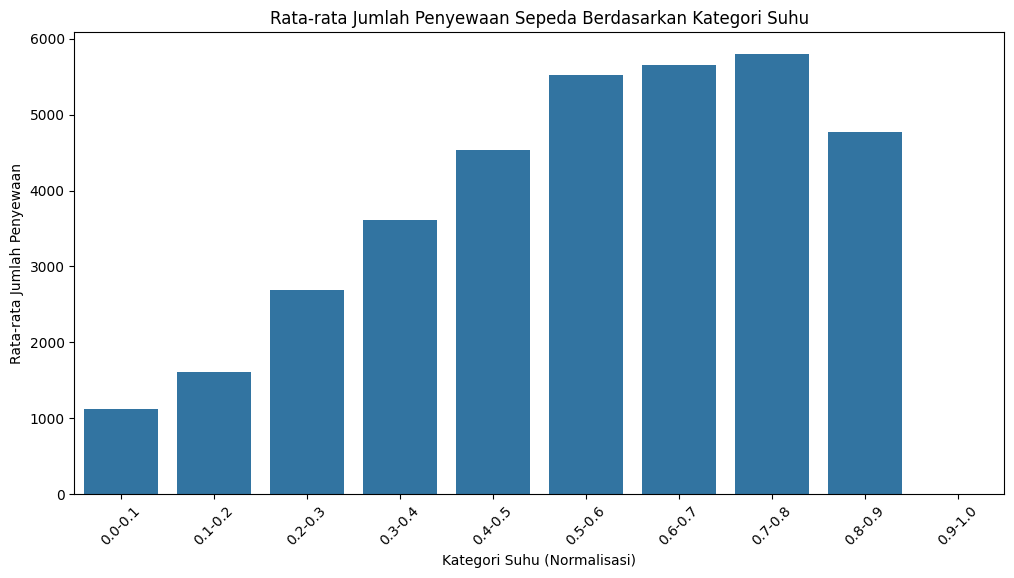

In [48]:
# Bar Plot
# Membuat kategori suhu
main_data['temp_category'] = pd.cut(main_data['day_temp'], bins=np.arange(0, 1.1, 0.1), labels=[f'{i:.1f}-{i+0.1:.1f}' for i in np.arange(0, 1, 0.1)])

# Menghitung rata-rata penyewaan berdasarkan kategori suhu
avg_rentals_by_temp = main_data.groupby('temp_category')['cnt_y'].mean().reset_index()

# Visualisasi rata-rata penyewaan berdasarkan kategori suhu
plt.figure(figsize=(12, 6))
sns.barplot(x='temp_category', y='cnt_y', data=avg_rentals_by_temp)
plt.title('Rata-rata Jumlah Penyewaan Sepeda Berdasarkan Kategori Suhu')
plt.xlabel('Kategori Suhu (Normalisasi)')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:

Index(['instant_x', 'dteday', 'season_x', 'yr', 'mnth_x', 'hr', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp', 'atemp', 'hum',
       'windspeed', 'casual_x', 'registered_x', 'cnt_x', 'instant_y',
       'season_y', 'mnth_y', 'holiday_y', 'weekday_y', 'workingday_y',
       'weathersit_y', 'day_temp', 'day_atemp', 'day_hum', 'day_windspeed',
       'casual_y', 'registered_y', 'cnt_y', 'temp_category'],
      dtype='object')


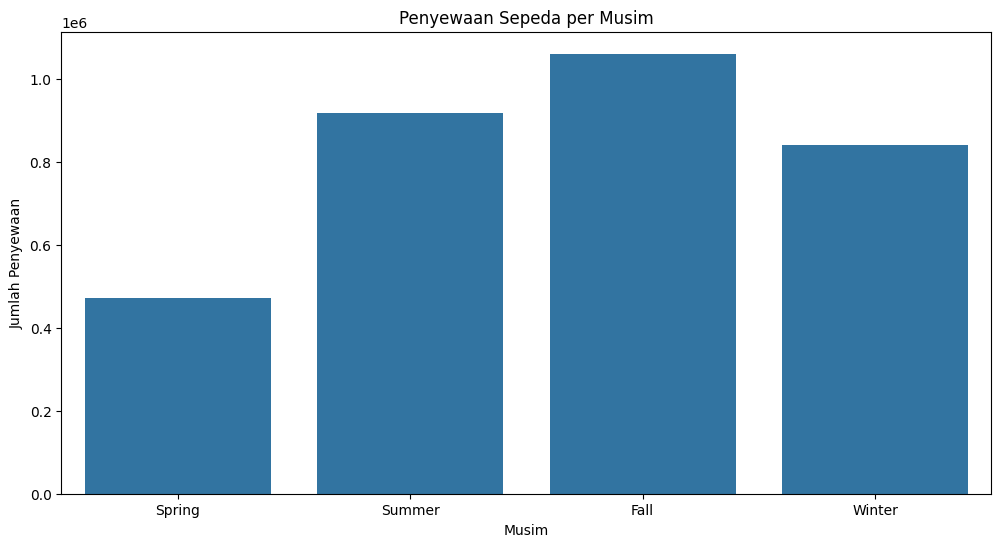

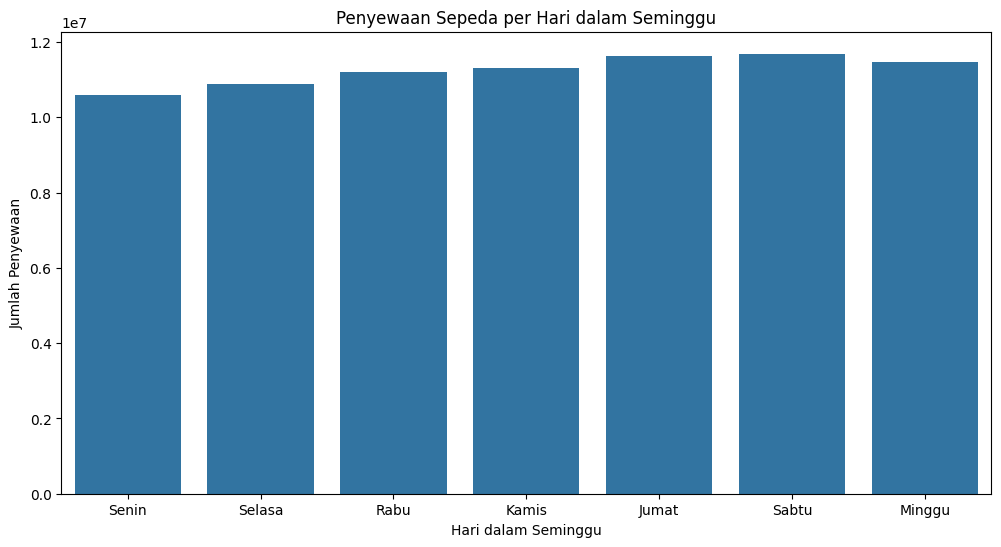

In [49]:
# Memeriksa kolom yang ada di main_data
print(main_data.columns)

# Visualisasi penyewaan berdasarkan musim
plt.figure(figsize=(12, 6))
season_rentals = main_data.groupby('season_x')['cnt_x'].sum().reset_index()
season_rentals['season_x'] = season_rentals['season_x'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
sns.barplot(x='season_x', y='cnt_x', data=season_rentals)
plt.title('Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Visualisasi penyewaan berdasarkan hari dalam seminggu
plt.figure(figsize=(12, 6))
weekday_rentals = main_data.groupby('weekday_y')['cnt_y'].sum().reset_index()
sns.barplot(x='weekday_y', y='cnt_y', data=weekday_rentals)
plt.title('Penyewaan Sepeda per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=np.arange(7), labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

**Insight:**
- Visualisasi memberikan cara yang kuat untuk menyampaikan informasi. Dengan menggunakan box plot dan bar plot, kita dapat menunjukkan bagaimana suhu dan musim memengaruhi jumlah penyewaan sepeda.
- Visualisasi yang baik membantu dalam menarik kesimpulan yang lebih jelas dan mendukung pengambilan keputusan.

## Analisis Lanjutan (Opsional)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Analisis Lanjutan: Regresi Linier

# 1. Menyiapkan Data
# Memilih fitur dan target variabel
features = ['day_temp', 'day_atemp', 'hum', 'day_windspeed', 'weathersit_y']
X = main_data[features]
y = main_data['cnt_y']

# 2. Membagi Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Membangun Model Regresi Linier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Membuat model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Memprediksi dan Evaluasi Model
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Menampilkan koefisien regresi
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

Mean Absolute Error: 1144.5349797165186
R-squared: 0.46116452897257476
               Coefficient
day_temp       3069.780413
day_atemp      3544.135092
hum            -752.479645
day_windspeed -3431.923920
weathersit_y   -652.558051


- Melakukan analisis regresi linier memungkinkan kita untuk memahami hubungan antara variabel independen (seperti suhu, kelembapan, dan kecepatan angin) dan variabel dependen (jumlah penyewaan).
- Dengan model regresi, kita dapat memprediksi jumlah penyewaan berdasarkan faktor-faktor tersebut, memberikan wawasan yang lebih dalam tentang bagaimana setiap faktor berkontribusi terhadap penyewaan sepeda

## Conclusion

- Kesimpulan dari analisis memberikan ringkasan dari temuan utama. Misalnya, kita dapat menyimpulkan bahwa suhu memiliki pengaruh positif yang signifikan terhadap jumlah penyewaan sepeda, dan bahwa penyewaan bervariasi berdasarkan musim dan hari dalam seminggu.
- Kesimpulan ini dapat digunakan untuk merumuskan strategi bisnis, seperti meningkatkan promosi pada hari-hari tertentu atau saat suhu tinggi.

Setiap langkah dalam analisis data memiliki tujuan dan memberikan wawasan yang berbeda. Dari pengumpulan data hingga kesimpulan, proses ini membantu kita memahami faktor-faktor yang memengaruhi penyewaan sepeda dan memberikan dasar untuk pengambilan keputusan yang lebih baik. Dengan menggunakan teknik analisis dan visualisasi yang tepat, kita dapat menggali informasi yang berharga dari data yang kita miliki.